# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [5]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [6]:
from google.colab import files
uploaded =files.upload()  

Saving foodhub_order.csv to foodhub_order.csv


In [7]:
# read the data
import io
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [8]:
print("The data have",df.shape[0], "rows and",df.shape[1],"columns.")

The data have 1898 rows and 9 columns.


#### Observations:


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [9]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:




1.   There are 5 numerical columns in the data and 4 object columns 
2.   The rating column is being read as object type column because of the "Not given" entries. This should be a numerical column.










In [10]:
#Let's check the count of the different data types in the Rating column
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

From the data type check on the Rating column, we can see that the column was coded as string variable. The "Not given" needs to be changed to Nan and the overall column changed to an integer type variable 

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [11]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:


There are no missing values in the data set

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.000,NaN,NaN,NaN,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,NaN,NaN,NaN,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.000,NaN,NaN,NaN,16.499,7.484,4.470,12.080,14.140,22.297,35.410
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.000,NaN,NaN,NaN,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,NaN,NaN,NaN,24.162,4.973,15.000,20.000,25.000,28.000,33.000


#### Observations:




*  **Cost of the order**: The average price of orders from the restaurants is 16.5. The most paid for an order is 35
*   **Food preparation time**: The average time to prepare is 27 mins. The minimum time is 20 mins, and the maximum time is 35 mins
* **Delivery time**: The average delivery time for an order is 24 mins, the minimum time is 15min, the maximum delivery time is 33 mins. 75% of the orders are delivered in 28 mins or less
*   **Rating**: 736 orders are not rated





### **Question 5:** How many orders are not rated? [1 mark]

In [13]:
df.loc[df['rating'] == 'Not given'].value_counts()

order_id  customer_id  restaurant_name        cuisine_type   cost_of_the_order  day_of_the_week  rating     food_preparation_time  delivery_time
1476551   49034        The Smile              American       12.180             Weekend          Not given  22                     27               1
1477772   91958        TAO                    Japanese       12.180             Weekday          Not given  26                     33               1
1477753   65306        Sushi of Gari Tribeca  Japanese       14.790             Weekend          Not given  32                     24               1
1477756   251607       Shake Shack            American       14.120             Weekday          Not given  31                     28               1
1477757   60688        Shake Shack            American       14.120             Weekend          Not given  29                     30               1
                                                                                                         

#### Observations:736 orders out of the 1898 are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

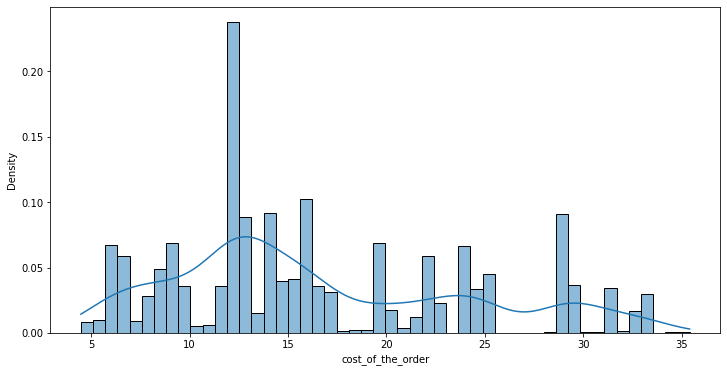

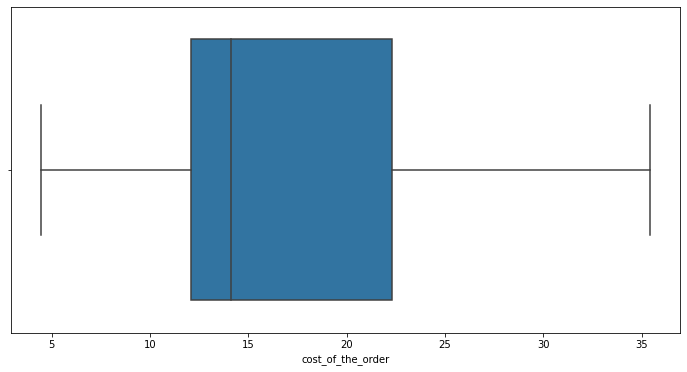

In [14]:
# Observation on Cost of order
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='cost_of_the_order',stat='density',bins=50,kde='true')
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='cost_of_the_order')
plt.show()



*   The distribution is skewed towards the right
*   There are no outliers in this column



<Figure size 864x432 with 0 Axes>

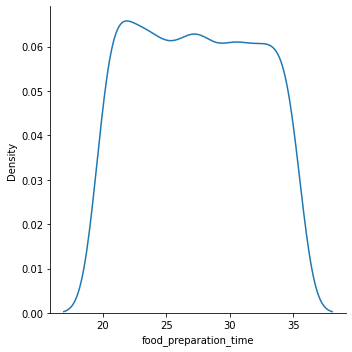

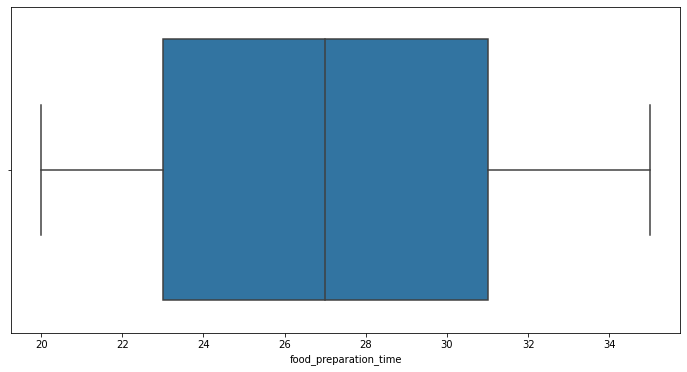

In [45]:
#Observation on Food preparation time
plt.figure(figsize=(12,6))
sns.displot(data=df,x='food_preparation_time',kind='kde')
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='food_preparation_time')
plt.show()



*   The distribution of the food preparation time is normal
*   There are no outliers in the data
*   The food preparation time ranges from 20 mins to about 35 mins 





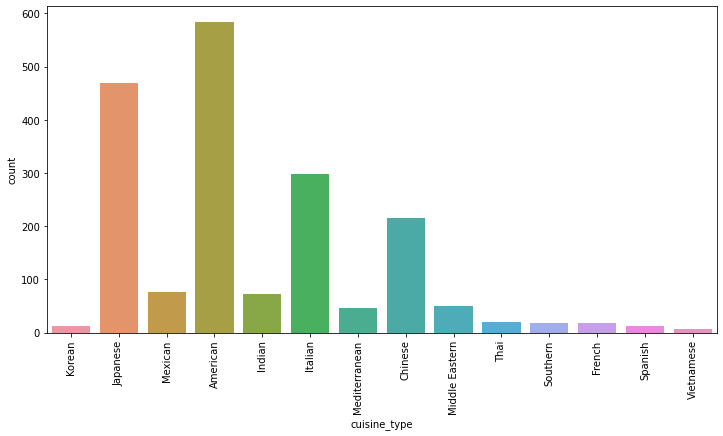

In [16]:
#Observations on Cuisine Types
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

The most ordered cuisine as shown by the bar graph is American followed by Japanese and Italian. Vietnamese cuisine is the least ordered cuisine

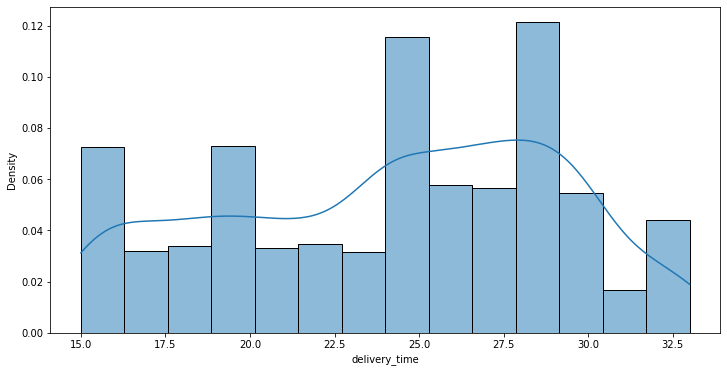

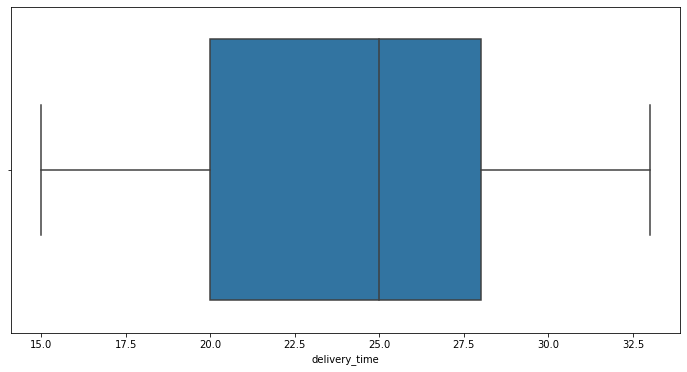

In [17]:
#Observations on Delivery Time
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='delivery_time',stat='density',kde='true')
plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='delivery_time')
plt.show()



*   The distribution is skewed to the left
*   There are no outliers in the data



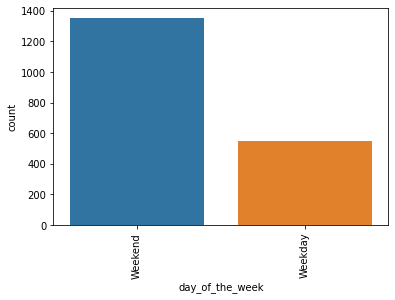

In [18]:
#Observations on Day of the Week
sns.countplot(data=df,x='day_of_the_week')
plt.xticks(rotation=90)
plt.show()



*   Most of the orders are placed in the Weekend



In [19]:
#Observations on unique order counts
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64



1.   There are a total of 1200 unique order counts
2.   The most number of return order by the same customer is 13 and most customers ordered only once



### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [20]:
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top 5 restaurants are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm


In [21]:
#Observation on last 5 orders
df['restaurant_name'].value_counts().iloc[-5:]

Sushi Choshi        1
Dos Caminos Soho    1
La Follia           1
Philippe Chow       1
'wichcraft          1
Name: restaurant_name, dtype: int64



*   The last 5 restaurants have only one order apiece



### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [22]:
df.loc[df['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().idxmax()


'American'

#### Observations: American Cuisine is the most popular cuisine on Weekends


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [23]:
df_over20=df[df['cost_of_the_order'] > 20].value_counts(normalize=True)
print(df_over20)

order_id  customer_id  restaurant_name                        cuisine_type    cost_of_the_order  day_of_the_week  rating     food_preparation_time  delivery_time
1476560   149508       Shake Shack                            American        22.260             Weekend          4          32                     17              0.002
1477852   74412        da Umberto                             Italian         32.980             Weekend          Not given  30                     28              0.002
1477846   52574        Blue Ribbon Sushi                      Japanese        24.250             Weekday          5          30                     26              0.002
1477847   106478       Blue Ribbon Sushi                      Japanese        24.250             Weekday          4          22                     29              0.002
1477848   276192       12 Chairs                              Middle Eastern  29.050             Weekday          5          28                     32        

In [24]:
print('The percentage of orders that cost more than 20 dollars is',"{:.1f}".format(len(df_over20)/len(df)*100),"%")

The percentage of orders that cost more than 20 dollars is 29.2 %


#### Observations: About 29.2 percent of the orders cost more than 20 dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [25]:
df['delivery_time'].mean().round()

24.0

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [26]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations: The Top 3 Customer IDs are: 52832, 47440, 83287. The Top 3 placed 13,10 and 9 orders respectively.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [27]:
#Starting with checking the correllation of the dataset
df.corr()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000,-0.014,0.021,-0.007,0.010
customer_id,-0.014,1.000,-0.001,-0.030,-0.010
cost_of_the_order,0.021,-0.001,1.000,0.042,-0.030
food_preparation_time,-0.007,-0.030,0.042,1.000,0.011
delivery_time,0.010,-0.010,-0.030,0.011,1.000


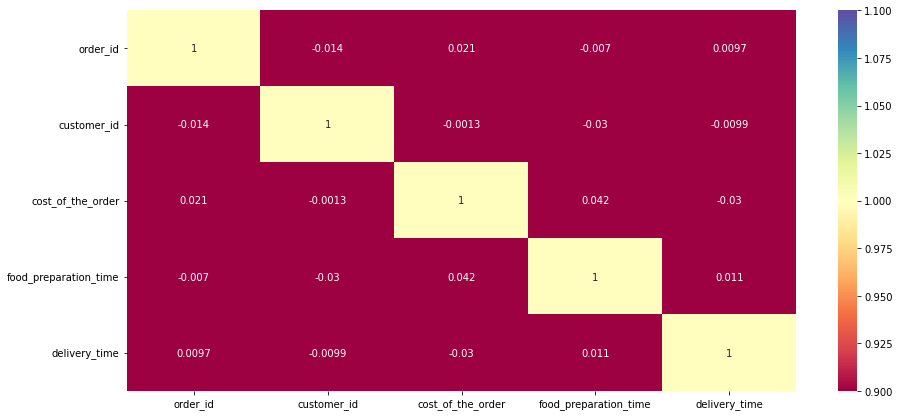

In [28]:
#Exploring the correlation using a heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=1,vmax=1)
plt.show()



*   No Significant Correlation noticed between the numeric variables



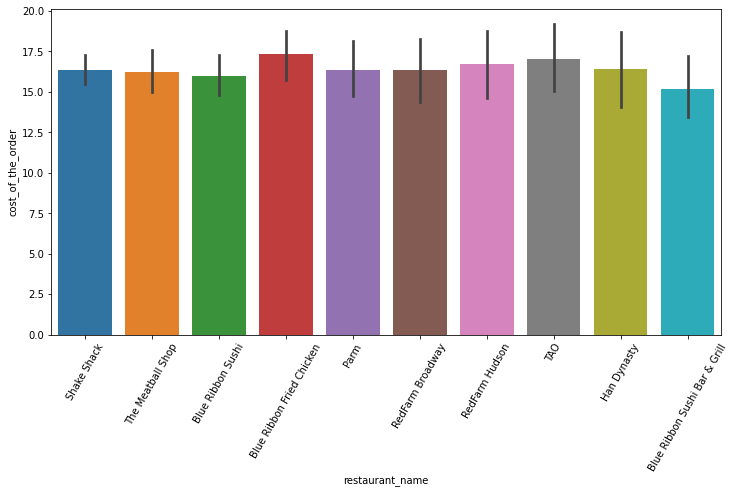

In [29]:
#Exploring the relationship between the top 10 restaurants and the average price of the orders
plt.figure(figsize=(12,6))
plt.xticks(rotation=60)
sns.barplot(data=df,x='restaurant_name',y='cost_of_the_order',order=df['restaurant_name'].value_counts().iloc[:10].index)



*   Blue Ribbon Fried Chicken has the highest mean order cost



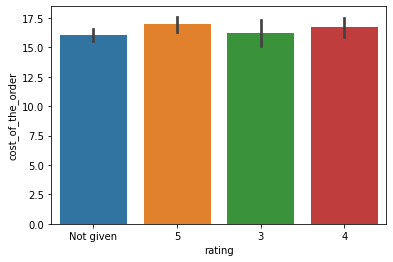

In [30]:
#Exploring the relationship between the cost of the order and the rating
sns.barplot(data=df,x="rating",y="cost_of_the_order")

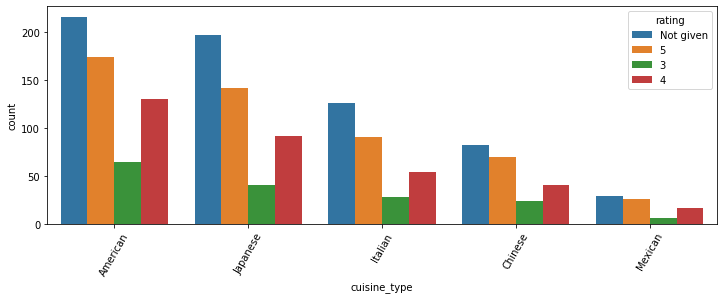

In [31]:
#Exploring cuisines with the topmost ratings
plt.figure(figsize=(12,4))
plt.xticks(rotation=60)
sns.countplot(data = df, x = 'cuisine_type', hue = 'rating', order = df.cuisine_type.value_counts().iloc[:5].index)



*   The Top 3 cuisine with 5 star ratings are: American, Japanese and Italian



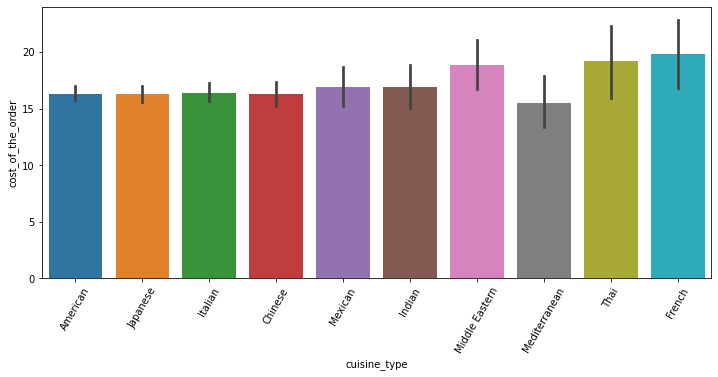

In [32]:
#Exploring the relationship between the average cost of order and cuisine type
plt.figure(figsize=(12,5))
plt.xticks(rotation=60)
sns.barplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order', order = df.cuisine_type.value_counts().iloc[:10].index)

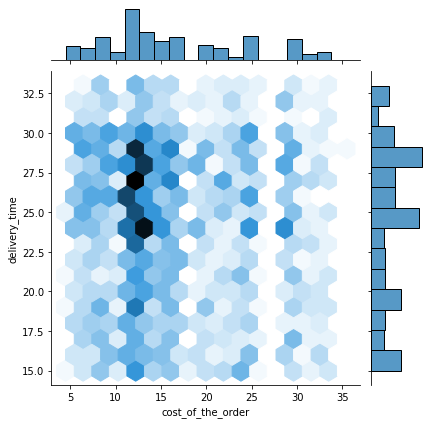

In [33]:
sns.jointplot(data = df, x = 'cost_of_the_order', y = 'delivery_time',kind='hex')

Observation: Cost of the order is dense around $12 and the delivery time is between 22.5-30 minutes



Although a good number of the orders have a no ratings provided, the average price of the orders have infinitesimal effect on the ratings 



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [34]:
#First let's filter out the rows with "Not given" in the ratings column
df1 = df.drop(df.index[(df['rating'] != '3') & (df['rating'] != '4') & (df['rating'] != '5')])
df1.head()



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.220,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.970,Weekday,3,33,30


In [35]:
#Next, the rating column for the new dataframe will be converted to string data type
df1['rating'].astype(int);

In [36]:
#restaurant with ratings count of more than 50
df1['restaurant_name'].value_counts()>50

Shake Shack                     True
The Meatball Shop               True
Blue Ribbon Sushi               True
Blue Ribbon Fried Chicken       True
RedFarm Broadway               False
                               ...  
Philippe Chow                  False
Dirty Bird To Go (archived)    False
The MasalaWala                 False
Kambi Ramen House              False
'wichcraft                     False
Name: restaurant_name, Length: 156, dtype: bool

In [37]:
#As shown above, only 4 restaurants meets the criteria so far. Next is to check for restaurants that meets the average ratings criteria
df1_new=df1.drop(df1.index[(df1['restaurant_name'] != 'Shake Shack')&(df1['restaurant_name'] != 'Blue Ribbon Fried Chicken')
&(df1['restaurant_name'] != 'The Meatball Shop')&(df1['restaurant_name'] != 'Blue Ribbon Sushi')])
df1_new.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.300,Weekend,5,23,17
15,1477414,66222,Shake Shack,American,16.200,Weekend,5,33,25
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.200,Weekend,4,35,26
22,1478287,150599,Shake Shack,American,29.100,Weekday,5,21,30


In [38]:
df1_new['rating']=df1_new['rating'].astype('int')

In [39]:
df1_new.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).head()

restaurant_name
The Meatball Shop           4.512
Blue Ribbon Fried Chicken   4.328
Shake Shack                 4.278
Blue Ribbon Sushi           4.219
Name: rating, dtype: float64

#### Observations: Only 4 restaurants satisfies this criteria

*   The Meatball Shop
*   Blue Ribbon Fried Chicken


*   Shake Shack
*   Blue Ribbon Sushi






### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [40]:
# To do this, a for loop can be used 
netrev = 0
for i in df['cost_of_the_order']:
  if i > 20:
    netrev=netrev+(i*0.25)
  elif 5 < i < 20:
    netrev=netrev+(i*0.15)
  else:
    netrev=netrev+ (i*0)
print('The net revenue generated by the company on all orders is:', "{:.2f}".format(netrev))

The net revenue generated by the company on all orders is: 6166.30


#### Observations: The net revenue generated by the company on all orders is: **$6,166.30**


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [41]:
# A new column will be introduced to the data to show the total delivery time
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']
total_delivery_over_60mins=df[df['total_delivery_time']> 60].value_counts()
print('The percentage of orders that take more than 60 mins to deliver is:',"{:.2f}".format(len(total_delivery_over_60mins)/len(df)*100),"%")

The percentage of orders that take more than 60 mins to deliver is: 10.54 %


#### Observations: About 10.54 percent of the orders took more than 60 mins to deliver


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

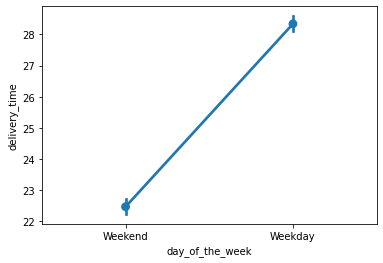

In [42]:
sns.pointplot(data=df,x='day_of_the_week',y='delivery_time')
plt.show()

#### Observations: The mean delivery time on Weekdays is about 28.5 mins, while during the Weekends, the mean delivery time is about 22.5 mins. This shows that it takes longer for orders to be dlivered during the Weekdays than during the Weekends 


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Most of the foodhub orders are placed during the Weekend
*  The most repeat orders placed on the Foodhub app by a customer is 13, while most of the total orders placed on the app are just once 
*  Despite the Weekend having more orders than the weekday, the average delivery time is shorter when compared to the weekday's
* A good percentage of the orders are not rated (~39%)
* Only three (3) restaurants received more than 100 orders. The top cuisines ordered are American, Japanese, Italian and Chinese





### Recommendations:

*  Since there is a wide gap between the number of orders delivered during the weekend and weekday. Foodhub should look into potential incentive driven campaign to drive deliveries during the weekdays to keep up with the weekend deliveries


*  Only 3 restaurants received more than 100 orders while other restaurants barely crossed the 50 orders mark. Although there are insufficient data like when the restaurants signed up on the app to comapare recency to the number or orders received, a root cause analysis should be done to investigate the reason behind the low number of orders by the lagging restaurants and potential marketing suggestions to drive up sales by those restaurants.


*   The Top 3 most rated cuisine types are American, Japanes and Italian. More restauarants offering these cuisines should be targeted for marketing to sign up on the app


*   Customers can be incentisized to provide ratings so as to be able to get more data on the customer experience on each orders and restaurants 



*   To increase the number of return orders on the app, a point system for incentives and feebies can be developed by the marketing department.

* The breadth of the data gathered should be expanded to capture the location and time of the day when the orders were made among others to facilitate better EDA to drive business improvements  







---